# Loading libraries

In [1]:


import pandas as pd

import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns


from surprise import Dataset, Reader


# loading data from file and Giving column names

In [2]:
ratings_Df = pd.read_csv('ratings_Electronics.csv',
                  names=["UserId", "ProductId", "Ratings", "Timestamp"])

ratings_Df.head()

,UserId,ProductId,Ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
ratings_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
UserId       object
ProductId    object
Ratings      float64
Timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [4]:
ratings_Df.describe()

,Ratings,Timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


# making a subset

In [5]:
counts = ratings_Df['UserId'].value_counts()


selecting the users who gave ratings more then 200

In [6]:
final_ratings = ratings_Df[ratings_Df['UserId'].isin(counts[counts > 200].index)]


Preparing the data for Collabrative filtering...
Final ratings using for poularity recommender system...
Using col_data for Collabrative recommender system...

In [7]:
final_ratings.drop("Timestamp", axis=1, inplace=True)
reader = Reader(rating_scale=(1,5))
col_data = Dataset.load_from_df(final_ratings, reader)

In [8]:
final_ratings.head()

,UserId,ProductId,Ratings
2162,A5JLAU2ARJ0BO,1400532655,1.0
3383,A3PD8JD9L4WEII,1400699169,5.0
4614,A1VQHH85U7PX0,9043413585,3.0
5195,A36K2N527TXXJN,9800359788,5.0
5932,ADLVFFE4VBT8,9981719005,3.0


In [9]:
final_ratings.describe()

,Ratings
count,13662.000000
mean,4.302811
std,1.006540
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# ploting histogram

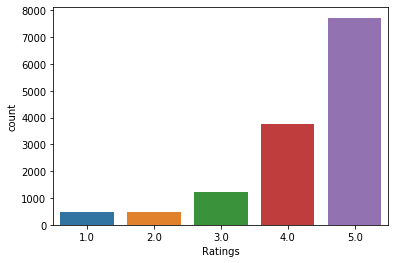

In [10]:
sns.countplot(final_ratings['Ratings'])

In [11]:
final_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13662 entries, 2162 to 7824438
Data columns (total 3 columns):
UserId       13662 non-null object
ProductId    13662 non-null object
Ratings      13662 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.0+ MB


# building popularity Recommender model

Getting top 5 movies atleast rated morethen 10 people

In [12]:
prod_counts = final_ratings['ProductId'].value_counts()
prod_final_ratings = final_ratings[final_ratings['ProductId'].isin(prod_counts[prod_counts > 10].index)]

In [13]:
prod_final_ratings.groupby('ProductId')['Ratings'].mean().sort_values(ascending=False).head(5)

ProductId
B00G4UQ6U8    5.000000
B00DK2JQOQ    5.000000
B003ES5ZUU    5.000000
B00829TIEK    4.833333
B00DTZYHX4    4.833333
Name: Ratings, dtype: float64

# Colabrating filter

In [14]:
from surprise.model_selection import train_test_split
import surprise
from surprise import KNNWithMeans
from surprise import accuracy

from surprise.dataset import DatasetAutoFolds
from surprise.prediction_algorithms import AlgoBase
from surprise.model_selection import GridSearchCV

# Spliting the data randomly into train and test dataset  in 70/30 ratio

In [15]:
trainset, testset = train_test_split(col_data, test_size=.30)

Implementing KNNMeans for similarity matrix

In [16]:

algo = KNNWithMeans(k=5, sim_options={'name': 'cosine',
               'user_based': False})
algo.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.


In [17]:
test_pred = algo.test(testset)

# Calculating RMSE

In [18]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.0578


1.0578090544596146

# Function to get the top 5 products for perticular user

In [19]:
def getTopPredictions(userId):
    d = predict_data.loc[predict_data['uid'] == userId]
    return d.sort_values(by='est', ascending=False ).head(5)
     

In [20]:
test_pred.sort()
test_pred


[Prediction(uid='A11I1I9QLMAM1A', iid='B0006BKH3S', r_ui=5.0, est=3.2666666666666666, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid='A11I1I9QLMAM1A', iid='B0014DUHLO', r_ui=3.0, est=4.303879535710551, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A11I1I9QLMAM1A', iid='B0018BRUCG', r_ui=4.0, est=4.303879535710551, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A11I1I9QLMAM1A', iid='B001H9O1EE', r_ui=4.0, est=4.303879535710551, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A11I1I9QLMAM1A', iid='B001P80EZW', r_ui=5.0, est=4.303879535710551, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A11I1I9QLMAM1A', iid='B002DM8AS2', r_ui=4.0, est=4.303879535710551, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A11I1I9QLMAM1A', iid='B002JP6K7Q', r_ui=5

In [21]:
predict_data = pd.DataFrame(test_pred.copy())

*** Enter the user id to whome we need to display the recommonded top 5 products ***

In [22]:
topMoviesForUser = getTopPredictions('AWPODHOB4GFWL')
topMoviesForUser

,uid,iid,r_ui,est,details
4098,AWPODHOB4GFWL,B00JGGV15C,5.0,5.0,"{'actual_k': 5, 'was_impossible': False}"
4037,AWPODHOB4GFWL,B001P05NBA,5.0,5.0,"{'actual_k': 5, 'was_impossible': False}"
4077,AWPODHOB4GFWL,B00ASHU4WY,5.0,5.0,"{'actual_k': 5, 'was_impossible': False}"
4022,AWPODHOB4GFWL,B000K2NWYE,4.0,5.0,"{'actual_k': 1, 'was_impossible': False}"
4080,AWPODHOB4GFWL,B00BAM2PJQ,4.0,5.0,"{'actual_k': 5, 'was_impossible': False}"


**Displaying the top 5 movies for given user**

In [23]:
topMoviesForUser['iid']

4098    B00JGGV15C
4037    B001P05NBA
4077    B00ASHU4WY
4022    B000K2NWYE
4080    B00BAM2PJQ
Name: iid, dtype: object

# Summarising insights about both the models

*** Insights about popularity recommender model ***

Popularity recommender model can be used for the new users also. It can give suggestions for the new users. There is no need of information abot users or products. But it can not be used to recommend the perticular products for the user conviniance.

*** Insites about Collabrative Filtering ***

This can be used to recommend the products based on the user preferences. Inorder to give the recommendations we need to have user data. But with this technique we can not give recommendations for the new users as they did not gave rating for any of the products.